# Sprint課題 機械学習スクラッチ入門
## スクラッチ
このSprintでは機械学習手法のスクラッチ課題に取り組む準備を行います。scikit-learnを用いて分類・回帰問題を解くコードを書いておき、今後のSprintではそれと同じ動作をするクラスをスクラッチで作成していきます。

### スクラッチの意義
ここでのスクラッチとは、NumPyなどの基本的なライブラリを組み合わせることで、scikit-learnのような応用的なライブラリと同じ機能のクラス・関数を自作することを指します。

スクラッチをすることでscikit-learnなどのライブラリを動かすだけでは掴みづらい、アルゴリズムの深い理解を目指します。コーディングのスキル向上も兼ねますが、それは主な目的ではありません。

以下のような効果を狙っています。

* 新たな手法に出会った時に理論・数式を理解しやすくする
* ライブラリを使う上での曖昧さを減らす
* 既存の実装を読みやすくする
## データの準備

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# データの読み込み
from sklearn.datasets import load_iris
iris = load_iris()
feature_data = iris.data
target_data = iris.target
c = np.c_[feature_data,target_data]
data = c[c[:,4] >= 1]
X_iris = data[:,0:4]
y_iris = data[:,4]
y_iris.shape
X_iris.shape

(100, 4)

In [16]:
# データセットの作成①
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X1 = X[random_index]
y1 = y[random_index]

In [17]:
# データセットの作成②
X2 = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# 【問題1】train_test_splitのスクラッチ
スクラッチの練習として、scikit-learnのtrain_test_splitを自作してみます．                  
sklearn.model_selection.train_test_split：https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

なお、作成した関数がscikit-learnのtrain_test_splitと同じ動作をしているか必ず確認をするようにしましょう。

In [18]:
def scratch_train_test_split(X,y,train_size=0.8):
    np.random.seed(seed=0)
    # サンプル数と同じ数の0～１未満の乱数
    arr_rand = np.random.rand(X.shape[0])
    # train_size％に入る
    split = arr_rand < np.percentile(arr_rand, 100*train_size)
    
    # Xをtrainとtestに分ける
    X_train = X[split]
    X_test =  X[~split]
    # ｙをtrainとtestに分ける
    y_train = y[split]
    y_test = y[~split]
    
    return X_train,X_test,y_train,y_test

### 検証①　iris

In [19]:
# 自作
X_train,X_test,y_train,y_test = scratch_train_test_split(X_iris,y_iris,train_size=0.8)
print('scratch_train_test_split:')
print('分割前X:',X_iris.shape)
print('分割前ｙ:',y_iris.shape)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

scratch_train_test_split:
分割前X: (100, 4)
分割前ｙ: (100,)
X_train: (80, 4)
X_test: (20, 4)
y_train: (80,)
y_test: (20,)


In [20]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_iris,y_iris,test_size=0.2)
print('sklearn train_test_split:')
print('分割前X:',X_iris.shape)
print('分割前ｙ:',y_iris.shape)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

sklearn train_test_split:
分割前X: (100, 4)
分割前ｙ: (100,)
X_train: (80, 4)
X_test: (20, 4)
y_train: (80,)
y_test: (20,)


### 検証② データセット１

In [21]:
# 自作
X_train,X_test,y_train,y_test = scratch_train_test_split(X1,y1,train_size=0.8)
print('scratch_train_test_split:')
print('分割前X:',X1.shape)
print('分割前ｙ:',y1.shape)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

scratch_train_test_split:
分割前X: (500, 2)
分割前ｙ: (500,)
X_train: (400, 2)
X_test: (100, 2)
y_train: (400,)
y_test: (100,)


In [22]:
# train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.2)
print('sklearn train_test_split:')
print('分割前X:',X1.shape)
print('分割前ｙ:',y1.shape)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

sklearn train_test_split:
分割前X: (500, 2)
分割前ｙ: (500,)
X_train: (400, 2)
X_test: (100, 2)
y_train: (400,)
y_test: (100,)


### 検証③　データセット２

In [23]:
# 自作
X_train,X_test,y_train,y_test = scratch_train_test_split(X2,y2,train_size=0.8)
print('scratch_train_test_split:')
print('分割前X:',X2.shape)
print('分割前ｙ:',y2.shape)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

scratch_train_test_split:
分割前X: (40, 2)
分割前ｙ: (40,)
X_train: (32, 2)
X_test: (8, 2)
y_train: (32,)
y_test: (8,)


In [24]:
# train_test_split
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.2)
print('sklearn train_test_split:')
print('分割前X:',X2.shape)
print('分割前ｙ:',y2.shape)
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

sklearn train_test_split:
分割前X: (40, 2)
分割前ｙ: (40,)
X_train: (32, 2)
X_test: (8, 2)
y_train: (32,)
y_test: (8,)


# 【問題2】 分類問題を解くコードの作成
scikit-learnを使ったコードを作成していきます。
検証用データの分割には問題1で作成した自作の関数を用いてください。クロスバリデーションではなくホールドアウト法で構いません。           
                             
データセットは3種類用意します。
1つ目は事前学習期間同様にirisデータセットです。

sklearn.datasets.load_iris — https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

2値分類としたいため、以下の2つの目的変数のみ利用します。特徴量は4種類全て使います。

* virgicolorとvirginica            
                            
残り2つは特徴量が2つのデータセットを人工的に用意します。以下のコードで説明変数X,目的変数yが作成可能です。「シンプルデータセット1」「シンプルデータセット2」とします。特徴量が2つであるため可視化が容易です。
## １．ロジスティック回帰
ロジスティック回帰はscikit-learnにおいて**LogisticRegression**クラスと**SGDClassifier**クラスの2種類から使用できます。ここでは勾配降下法を用いて計算するSGDClassifierクラスを利用してください。引数で**loss="log"**とすることでロジスティック回帰の計算になります。
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

In [25]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

def logi(X=X,y=y,train_size=0.7):
    # trainデータとtestデータに分ける
    X_train,X_test,y_train,y_test = scratch_train_test_split(X,y,train_size)
    
    # 標準化
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    # インスタンス化
    clf = linear_model.SGDClassifier(loss='log',max_iter=5)
    # 学習
    clf.fit(X_train_std,y_train)
    # 推定
    y_pred = clf.predict(X_test_std)
    
    # 評価
    print('accuracy:{}'.format(accuracy_score(y_test,y_pred)))
    print('precision:{}'.format(precision_score(y_test,y_pred)))
    print('recall:{}'.format(recall_score(y_test,y_pred)))
    print('F値:{}'.format(f1_score(y_test,y_pred)))
    
    return y_pred

In [26]:
# iris
log_pred_iris = logi(X=X_iris,y=y_iris,train_size=0.7)
log_pred_iris

accuracy:0.9333333333333333
precision:0.9444444444444444
recall:0.9444444444444444
F値:0.9444444444444444


C:\Users\miyas\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2.])

In [27]:
# データセット１
log_pred_1 = logi(X=X1,y=y1,train_size=0.7)
log_pred_1

accuracy:1.0
precision:1.0
recall:1.0
F値:1.0


C:\Users\miyas\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([ 1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,
       -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1,
       -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,
        1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,
        1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1])

In [28]:
# データセット２
log_pred_2 = logi(X=X2,y=y2,train_size=0.7)
log_pred_2

accuracy:0.5
precision:0.4444444444444444
recall:0.8
F値:0.5714285714285714


C:\Users\miyas\Anaconda3\envs\test\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1])

## ２．SVM
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

In [29]:
from sklearn.svm import LinearSVC

def linear_svc(X=X,y=y,train_size=0.7):
    # trainデータとtestデータに分ける
    X_train,X_test,y_train,y_test = scratch_train_test_split(X,y,train_size)

    # 標準化
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    
    # 初期化，学習，推定
    model = LinearSVC()
    model.fit(X_train_std,y_train)
    y_pred = model.predict(X_test_std)

    # 評価
    print('accuracy:{}'.format(accuracy_score(y_test,y_pred)))
    print('precision:{}'.format(precision_score(y_test,y_pred)))
    print('recall:{}'.format(recall_score(y_test,y_pred)))
    print('F値:{}'.format(f1_score(y_test,y_pred)))

    return y_pred

In [30]:
# iris
svm_pred_iris = linear_svc(X=X_iris,y=y_iris,train_size=0.7)
svm_pred_iris

accuracy:0.9
precision:0.9411764705882353
recall:0.8888888888888888
F値:0.9142857142857143


array([1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2.])

In [31]:
# データセット１
svm_pred_X1 = linear_svc(X=X1,y=y1,train_size=0.7)
svm_pred_X1

accuracy:1.0
precision:1.0
recall:1.0
F値:1.0


array([ 1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,
       -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1,
       -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,
        1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,
        1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1])

In [32]:
# データセット２
svm_pred_X2 = linear_svc(X=X2,y=y2,train_size=0.7)
svm_pred_X2

accuracy:0.4166666666666667
precision:0.3333333333333333
recall:0.4
F値:0.3636363636363636


array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1])

## ３．決定木
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

def tree(X,y,train_size):
    # trainデータとtestデータに分ける
    X_train,X_test,y_train,y_test = scratch_train_test_split(X,y,train_size)

    # インスタンス化
    model = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
    # 学習
    model.fit(X_train,y_train)
    # 推定
    y_pred = model.predict(X_test)

    # 評価
    print('accuracy:{}'.format(accuracy_score(y_test,y_pred)))
    print('precision:{}'.format(precision_score(y_test,y_pred)))
    print('recall:{}'.format(recall_score(y_test,y_pred)))
    print('F値:{}'.format(f1_score(y_test,y_pred)))
    
    return y_pred

In [34]:
# iris
tree_pred_iris = tree(X_iris,y_iris,0.7)
tree_pred_iris

accuracy:0.9333333333333333
precision:1.0
recall:0.8888888888888888
F値:0.9411764705882353


array([1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [35]:
# データセット１
tree_pred_X1 = tree(X1,y1,0.7)
tree_pred_X1

accuracy:1.0
precision:1.0
recall:1.0
F値:1.0


array([ 1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,
       -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1,
       -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,
        1,  1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,
        1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,
        1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1, -1, -1])

In [36]:
# データセット２
y_pred = tree(X2,y2,0.7)
y_pred

accuracy:0.75
precision:0.625
recall:1.0
F値:0.7692307692307693


array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1])

# 【問題3】 回帰問題を解くコードの作成
* 目的変数はSalePrice
* 説明変数はGrLivAreaとYearBuilt
* 勾配降下法を用いて計算するSGDRegressorクラスを利用
* Xもｙも標準化すれば，標準偏回帰係数が得られる？ので２パターンでやってみた．

In [83]:
# データの読み込み
df = pd.read_csv('C:/Users/miyas/kaggle/train.csv')
X = df.loc[:,['GrLivArea','YearBuilt']].values
y = df.SalePrice.values
y = np.array(y).reshape(-1,)

In [84]:
# trainデータとtestデータに分ける
X_train,X_test,y_train,y_test = scratch_train_test_split(X,y,train_size=0.7)

# 標準化
X_train_std = (X_train - X_train.mean()) / X_train.std()
X_test_std = (X_test -X_test.mean()) / X_test.std()
y_train_std = (y_train - y_train.mean()) / y_train.std()
y_test_std = (y_test - y_test.mean()) / y_test.std()

y_train_std = y_train_std.reshape(-1,)
y_test_std = y_test_std.reshape(-1,)

In [85]:
# 初期化，学習，推定
model = linear_model.SGDRegressor(max_iter=1000)
model.fit(X_train_std, y_train_std)
y_train_pred = clf.predict(X_train_std)
y_test_pred = clf.predict(X_test_std)
# 決定係数
print('決定係数：',model.score(X_test_std,y_test_std))

決定係数： 0.34831303137656644


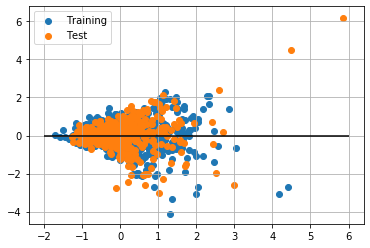

In [86]:
#残差をプロット
train = plt.scatter(y_train_pred,(y_train_pred-y_train_std))
test = plt.scatter(y_test_pred,(y_test_pred-y_test_std))
plt.hlines(y=0,xmin=-2,xmax=6)# y=0の水平な線を引く
plt.legend((train,test),('Training','Test'),loc='best')
plt.grid()

### 説明変数のみ標準化

In [87]:
# trainデータとtestデータに分ける
X_train,X_test,y_train,y_test = scratch_train_test_split(X,y,train_size=0.7)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [88]:
# 初期化，学習，推定
model2 = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
model2.fit(X_train_std,y_train)
y_train_pred = model2.predict(X_train_std)
y_test_pred = model2.predict(X_test_std)
# 決定係数
print('決定係数：',model2.score(X_test_std,y_test))

決定係数： 0.5041898896105113


In [89]:
y_train_pred.shape,y_train.shape

((1022,), (1022,))

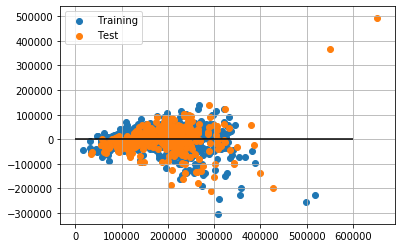

In [94]:
#残差をプロット
train = plt.scatter(y_train_pred,(y_train_pred-y_train))
test = plt.scatter(y_test_pred,(y_test_pred-y_test))
plt.hlines(y=0,xmin=0,xmax=600000)
plt.grid()
plt.legend((train,test),('Training','Test'),loc='best')